Chapter 02

# 方差分析
Book_7《机器学习》 | 鸢尾花书：从加减乘除到机器学习

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import yfinance as yf

In [2]:
p = plt.rcParams
p["font.sans-serif"] = ["Roboto"]
p["font.weight"] = "light"
p["ytick.minor.visible"] = False
p["xtick.minor.visible"] = False
p["axes.grid"] = True
p["grid.color"] = "0.5"
p["grid.linewidth"] = 0.5

## 下载、处理数据

In [3]:
y_x_df = yf.download(['AAPL','^GSPC'], start='2020-01-01', end='2020-12-31')
y_x_df = y_x_df['Adj Close'].pct_change()
y_x_df.dropna(inplace = True)

y_x_df.rename(columns={"^GSPC": "SP500"},inplace = True)
x_df = y_x_df[['SP500']]
y_df = y_x_df[['AAPL']]

[*********************100%%**********************]  2 of 2 completed


## 线性回归

In [4]:
# 增加一列全1
X_df = sm.add_constant(x_df)

model = sm.OLS(y_df, X_df)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   AAPL   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     550.5
Date:                Thu, 23 Nov 2023   Prob (F-statistic):           5.16e-65
Time:                        14:42:03   Log-Likelihood:                 675.37
No. Observations:                 251   AIC:                            -1347.
Df Residuals:                     249   BIC:                            -1340.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0019      0.001      1.819      0.0

## ANOVA表格

In [5]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

data = pd.DataFrame({'x': x_df['SP500'], 'y': y_df['AAPL']})
model_V2 = ols("y ~ x", data).fit()
anova_results = anova_lm(model_V2, typ=1)

print(anova_results)

             df    sum_sq   mean_sq           F        PR(>F)
x           1.0  0.149487  0.149487  550.451466  5.162541e-65
Residual  249.0  0.067621  0.000272         NaN           NaN


## 分析方差

In [6]:
y_mean = y_df.mean()

In [11]:
# Sum of Squares for Total, SST
SST = ((y_df - y_mean)**2).sum()
print(SST)
n = len(y_df)
print(n)

AAPL    0.217108
dtype: float64
251


In [9]:
# degree of freedom total, DFT
DFT = n - 1
# mean square total, MST
MST = SST/DFT
print(MST)

AAPL    0.000868
dtype: float64


In [27]:
type(results)

statsmodels.regression.linear_model.RegressionResultsWrapper

请大家参考如下链接，获取statsmodels.regression.linear_model.RegressionResultsWrapper中的methods和properties  
https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.RegressionResults.html

In [13]:
# predicted
y_hat = results.fittedvalues

y_hat = y_hat.to_frame()
y_hat = y_hat.rename(columns={0: 'AAPL'})
 

In [15]:
# Sum of Squares for Regression, SSR
SSR = ((y_hat - y_mean)**2).sum()
print(SSR)
# degrees of freedom for regression model
DFR = 1
# MSR: mean square regression
MSR = SSR/DFR
print(MSR)

AAPL    0.149487
dtype: float64
AAPL    0.149487
dtype: float64


In [28]:
# Sum of Squares for Error, SSE
SSE = ((y_df - y_hat)**2).sum()
print(SSE)

AAPL    0.067621
dtype: float64


In [19]:
# degrees of freedom for error, DFE
DFE = n - DFR - 1

In [29]:
# mean squared error, MSE
MSE = SSE/DFE
print(MSE)

AAPL    0.000272
dtype: float64


## 拟合优度
Goodness of fit

In [21]:
# coefficient of determination, R squared

# 计算决定系数
R2 = SSR/SST

# 计算修正决定系数
R2_adj = 1 - MSE/MST

## F-test

In [24]:
# 计算F检验的统计量
F_test = MSR/MSE
print(F_test)

# 验算F检验的统计量
N = results.nobs
k = results.df_model+1
dfm, dfe = k-1, N - k
F = results.mse_model / results.mse_resid
print(F)

AAPL    550.451466
dtype: float64
550.4514656002331


In [16]:
import scipy.stats as stats
p = 1.0 - stats.f.cdf(F,dfm,dfe)

alpha = 0.01
# F = 549.7
# n = 252
# D = 1
# p = D + 1

fdistribution = stats.f(p - 1, n - p) 
# build an F-distribution object
f_critical = fdistribution.ppf(1 - alpha)

p_value = 1 - stats.f.cdf(F, p - 1, n - p)

## 可视化

In [18]:
x_points = x_df.values.T
y_points = y_df.values.T
y_hat_points = y_hat.values.T

p = model.fit().params

# generate x-values for  regression line
x = np.linspace(x_df.min(),x_df.max(),10)

(-0.15, 0.15)

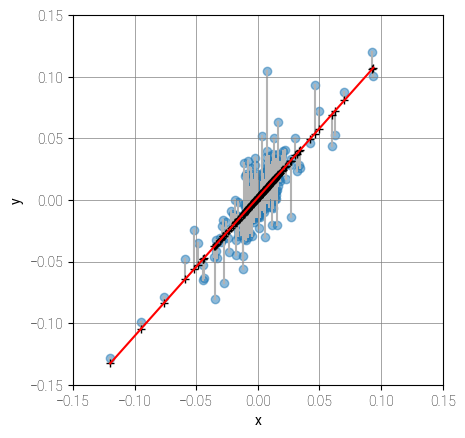

In [20]:
fig, ax = plt.subplots()
plt.scatter(x_df, y_df, alpha = 0.5)
plt.plot(x_points,y_hat_points,'+k'); 

plt.plot(x, p.const + p.SP500 * x,color = 'r')
plt.plot(np.vstack((x_points,x_points)),
     np.vstack((y_points,y_hat_points)),
     color = [0.7,0.7,0.7], zorder = 1);

plt.axis('scaled')
plt.ylabel('y')
plt.xlabel('x')
plt.xlim([-0.15,0.15])
plt.ylim([-0.15,0.15])